In [4]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go

import jdatetime

In [5]:
path = "../data"
nowruz_path = os.path.join(path, "traffic/nowruz_03")

In [9]:
province_data = pd.read_csv(os.path.join(path, "province_data.csv"))
province_data['code'] = province_data['code'].astype(str)
province_data.head()

,code,province,capital
0,11,Tehran,تهران
1,14,Qom,قم
2,15,Qazvin,قزوین
3,16,Mazandaran,ساری
4,18,Alborz,کرج


In [10]:
roads_df = pd.read_csv(os.path.join(path, "road_data.csv"))
roads_df['code'] = roads_df['code'].astype(str)
roads_df.head()

,code,type,origin,destination,place
0,113201,آزادراه,قم,گرمسار,چرمشهر
1,113202,NaN,شهریار,کرج,هفت جوی
2,113203,آزادراه,تهران,قم,مجتمع یاس
3,113206,آزادراه,تهران,پردیس,عوارضی پردیس
4,113207,آزادراه,تهران,پردیس,بومهن


## Plot in and out

In [14]:
pathToCompared = os.path.join(path, "total_sum_car_sorted")
file_compared = os.path.join(pathToCompared, "compared.csv")
df_compared = pd.read_csv(file_compared)
df_compared.drop(columns='Unnamed: 0', inplace=True)
df_compared['code'] = df_compared['code'].astype(int).astype(str)
df_compared.head()

,code,name_x,est_sum_total_est_x,est_sum_total_est_y,growth_rate
0,513404,خمين - اليگودرز,59695,3941.0,1414.717077
1,113413,آبعلي - پلور (سه‌راهي مشاء - امامزاده هاشم),271647,45914.0,491.643072
2,333151,بيرجند - سرايان (سرايان),29268,5220.0,460.689655
3,333158,عرب آباد - ديهوک,40222,7469.0,438.519213
4,113203,آزادراه تهران - قم (مجتمع ياس),1056939,200733.0,426.539732


In [20]:
province_growth = pd.DataFrame(columns=['code', 'city', 'growth_rate'])

for index, row in province_data.iterrows():
    province_code = row['code']
    city = row['capital']
    city_roads_df = roads_df.loc[roads_df['code'].str.startswith(province_code) & ((roads_df['origin'] == city) | (roads_df['destination'] == city))]
    
    # remove unwanted roads
    unwanted_type = ['عوارضی', 'کمربندی']
    unwanted_roads = []

    city_roads_df = city_roads_df.drop(city_roads_df[city_roads_df.type.isin(unwanted_type)].index)
    city_roads_df = city_roads_df.drop(city_roads_df[city_roads_df.code.isin(unwanted_roads)].index)

    # duplicates = city_roads_df.duplicated(subset=['type', 'origin', 'destination'], keep=False)
    # df_duplicates = city_roads_df[duplicates]
    # df_duplicates = df_duplicates.fillna('nan').groupby(['type', 'origin', 'destination'])['code'].apply(list)
    
    isfahan_dest = city_roads_df[city_roads_df['destination'] == city]
    isfahan_dest['code'] = isfahan_dest['code'].astype(int).astype(str)
    df_merged = pd.merge(isfahan_dest, df_compared, on='code', how='left')
    df_merged.sort_values(by='growth_rate', inplace=True)
    df_merged.reset_index(inplace=True)
    df_merged.drop(columns='index', inplace=True)
    df_cleaned = df_merged.dropna(subset=['est_sum_total_est_x', 'est_sum_total_est_y'])

    count_03 = df_cleaned['est_sum_total_est_x'].sum()
    count_02 = df_cleaned['est_sum_total_est_y'].sum()

    new_province = {
        "code": province_code,
        "city": city,
        "growth_rate": (count_03 - count_02) / count_02
    }
    province_growth.loc[len(province_growth)] = new_province

province_growth.sort_values(by='growth_rate', ascending=False, inplace=True)
province_growth

C:\Users\Dr.moosavi\AppData\Local\Temp\ipykernel_8328\588532216.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isfahan_dest['code'] = isfahan_dest['code'].astype(int).astype(str)
C:\Users\Dr.moosavi\AppData\Local\Temp\ipykernel_8328\588532216.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isfahan_dest['code'] = isfahan_dest['code'].astype(int).astype(str)
C:\Users\Dr.moosavi\AppData\Local\Temp\ipykernel_8328\588532216.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,code,city,growth_rate
0,11,تهران,0.116940
14,54,رشت,0.099664
22,77,شهرکرد,0.089828
29,95,بوشهر,0.087105
17,64,بندرعباس,0.076778
2,15,قزوین,0.065135
19,71,کرمانشاه,0.060739
7,31,مشهد,0.054382
23,81,خرم آباد,0.048156
21,75,همدان,0.043235


In [22]:
def drawchart(num):
    path = "F:\\Regression Analysis\\RA_P1\\data\\traffic\\"
    base_path_1 = os.path.join(path, "nowruz_02")
    file1 = os.path.join(base_path_1, f"{num}.csv")

    base_path_2 = os.path.join(path, "nowruz_03")
    file2 = os.path.join(base_path_2, f"{num}.csv")

    # Read both files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Optional: ensure date is string for consistent merging/sorting
    df1['date'] = df1['date'].astype(str).str[5:].str.replace("01-", "13-")
    df2['date'] = df2['date'].astype(str).str[5:].str.replace("01-", "13-")

    # Trim unwanted dates
    df1 = df1[(df1['date'] >= "12-29") & (df1['date'] <= "13-13")]
    df2 = df2[(df2['date'] >= "12-29") & (df2['date'] <= "13-13")]

    # Rename value columns to distinguish between the two
    name1 = (df1['name'].iloc[0] + "1402")
    name2 = (df2['name'].iloc[0] + "1403")
    df1 = df1[['date', 'car_est']].rename(columns={'car_est': name1})
    df2 = df2[['date', 'car_est']].rename(columns={'car_est': name2})

    # Merge the two DataFrames on 'date'
    merged = pd.merge(df1, df2, on='date', how='outer')

    # Melt to long format for Plotly
    df_long = merged.melt(id_vars='date', var_name='name', value_name='car_est')

    # Plot
    fig = px.line(
        df_long,
        x='date',
        y='car_est',
        color='name',
        title='تعداد سواری در روز، نوروز ۱۴۰۲ و ۱۴۰۳',
        markers=False
    )

    fig.update_layout(
        legend_title='نام محور',
        xaxis_title='تاریخ',
        xaxis_type='category',
        yaxis_title='تعداد',
        template='plotly_white',
        hovermode='x unified',
    )

    fig.show()

In [23]:
for index, row in df_compared.iterrows():
    print(row.code, row.est_sum_total_est_x, row.est_sum_total_est_y, row.growth_rate)
    drawchart(row.code)

513404 59695 3941.0 1414.7170768840397


113413 271647 45914.0 491.643071829943


333151 29268 5220.0 460.6896551724138


333158 40222 7469.0 438.5192127460169


113203 1056939 200733.0 426.5397318826501


333271 33063 6739.0 390.62175396943167


333404 22522 5451.0 313.1718950651257


513112 55269 13402.0 312.39367258618114


114309 179496 45680.0 292.94220665499125


513551 41414 10657.0 288.6084263864127


114359 191901 50275.0 281.702635504724


953251 120382 31816.0 278.3693738999246


153221 347997 98328.0 253.91444959726627


453804 52918 15342.0 244.92243514535264


543234 77893 23940.0 225.36758563074352


214753 135956 42059.0 223.25067167550347


364455 66072 20669.0 219.6671343557985


733151 98580 34130.0 188.8368004687958


453904 69222 25244.0 174.2116938678498


114307 45282 16838.0 168.92742606010216


113651 34291 12924.0 165.32807180439494


114357 43721 16646.0 162.6516880932356


113954 727855 301165.0 141.67981007089136


314152 32505 13733.0 136.69263817082938


733654 23794 10106.0 135.44429052048287


453256 32752 14694.0 122.89369810807132


333408 44126 19878.0 121.98410302847368


149905 179086 83679.0 114.01546385592565


153186 288412 135627.0 112.6508733511764


113501 263561 124657.0 111.4289610691738


113904 700558 334967.0 109.14239313126367


773222 100894 48664.0 107.32779878349498


643104 216946 105000.0 106.6152380952381


773272 96898 47242.0 105.10985987045424


733101 77143 37691.0 104.67220291316232


363164 165985 82399.0 101.4405514630032


813660 89794 44715.0 100.8140445040814


143253 37538 18800.0 99.67021276595744


315751 261604 133296.0 96.25795222662346


114102 124500 63597.0 95.76395112977028


733356 13499 6940.0 94.5100864553314


953114 598749 308520.0 94.07137300661222


113424 299155 154621.0 93.47630658190026


363601 91094 47822.0 90.48555058341348


733604 21475 11285.0 90.29685423128046


643163 214016 112616.0 90.04049158201322


143174 514299 273892.0 87.77437822207294


573556 32686 17584.0 85.88489535941765


414358 131254 70694.0 85.66497864033722


153271 194790 105035.0 85.45246822487742


314151 40546 22356.0 81.3651816067275


184256 176470 98838.0 78.54468928954451


363203 261230 146969.0 77.74496662561494


413217 139153 78323.0 77.66556439360086


163105 269148 152284.0 76.74082635076567


813551 110754 63130.0 75.4379851100903


833453 63088 36407.0 73.28535721152527


813105 206471 120771.0 70.96074388719146


313651 25827 15188.0 70.04872267579668


513215 243380 146331.0 66.32155865811072


164451 467299 281953.0 65.73648799622632


733306 13836 8354.0 65.62125927699306


184257 8235 4975.0 65.52763819095478


163154 385034 232677.0 65.48004314994607


513704 148188 89590.0 65.40685344346467


953655 100392 60779.0 65.1754717912437


643113 223907 135641.0 65.0732448153582


333403 9803 5945.0 64.89486963835157


833155 30972 18912.0 63.76903553299492


573951 196979 120465.0 63.51554393392272


613604 21122 12962.0 62.95324795556241


833403 56067 34495.0 62.53659950717495


153112 290131 178598.0 62.44918756089094


113206 606804 374121.0 62.19458410514246


833304 51682 31889.0 62.0684248486939


813152 282533 174974.0 61.47141861076503


573273 182628 113497.0 60.90997999947135


574453 72447 45106.0 60.61499578770009


573502 114252 71304.0 60.232245035341634


143157 668726 420985.0 58.84793995035452


163451 301219 190488.0 58.13017092940238


364353 71927 45705.0 57.372278744119896


214561 77609 49371.0 57.19551963703389


643653 32351 20597.0 57.06656309171238


973501 52429 33634.0 55.88095379675329


313170 44544 28580.0 55.85724282715185


643159 257649 166057.0 55.15696417495197


833356 60611 39100.0 55.015345268542205


733102 143337 92529.0 54.91035243004896


313601 27844 18207.0 52.93019168451695


213968 114649 75496.0 51.86102574970859


113353 336803 223042.0 51.00429515517256


713254 51041 33891.0 50.603405033784775


114451 374029 248553.0 50.48259324972943


213202 74894 49903.0 50.07915355790233


164401 421980 281718.0 49.78808595829872


543230 586393 392740.0 49.30819371594439


543310 390877 264046.0 48.03367595040258


713551 49804 33869.0 47.04892379462045


643146 274840 187228.0 46.79428290640289


113341 293641 200076.0 46.76472940282693


453567 139376 95028.0 46.66835038094035


143136 82568 56504.0 46.12770777290103


215352 47959 32848.0 46.0028007793473


753278 263818 180714.0 45.986475867946034


114301 145584 100057.0 45.50106439329582


113249 255161 175773.0 45.165070858436735


313194 323509 223910.0 44.48171140190255


264253 203493 141014.0 44.30694824627342


543360 380088 263602.0 44.19010477917467


413606 17875 12489.0 43.12595083673633


543280 591801 415392.0 42.46807834527387


153161 838821 590119.0 42.14438104856817


643196 288749 203158.0 42.130263144941374


184201 86350 61038.0 41.46924866476621


573507 76485 54121.0 41.32222242752351


753604 27778 19670.0 41.22013218098628


KeyboardInterrupt: 

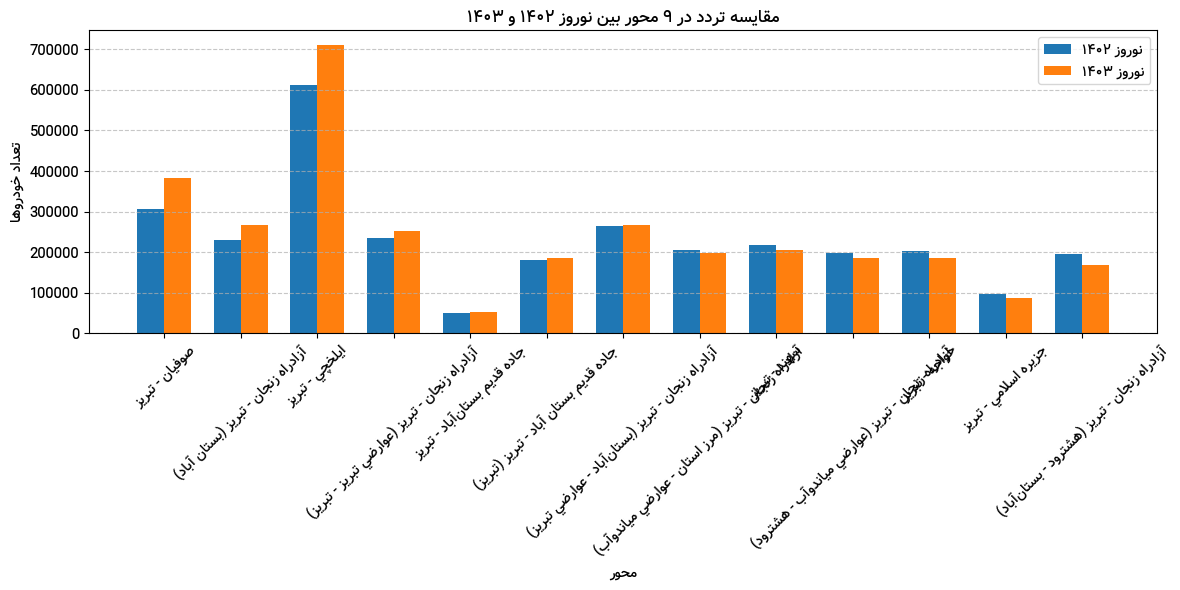

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# اعمال فونت دلخواه
matplotlib.rcParams['font.family'] = 'Vazir'
matplotlib.rcParams['axes.unicode_minus'] = False

# reshaping labels (مثلاً برای ستون‌ها)
labels = [get_display(arabic_reshaper.reshape(label)) for label in df_merged['name_x']]

count_02 = df_merged['est_sum_total_est_x']
count_03 = df_merged['est_sum_total_est_y']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, count_02, width, label=get_display(arabic_reshaper.reshape('نوروز ۱۴۰۲')))
plt.bar(x + width/2, count_03, width, label=get_display(arabic_reshaper.reshape('نوروز ۱۴۰۳')))

plt.xlabel(get_display(arabic_reshaper.reshape('محور')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد خودروها')))
plt.title(get_display(arabic_reshaper.reshape('مقایسه تردد در ۹ محور بین نوروز ۱۴۰۲ و ۱۴۰۳')))
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
import plotly.graph_objects as go
import pandas as pd

# آماده‌سازی دیتافریم
df_bar = df_merged[['name_x', 'est_sum_total_est_x', 'est_sum_total_est_y']].copy()
df_bar.columns = ['محور', 'نوروز ۱۴۰۲', 'نوروز ۱۴۰۳']

# reshape کردن به فرمت long
df_long = df_bar.melt(id_vars='محور', var_name='سال', value_name='تعداد')

# رسم نمودار
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_long[df_long['سال'] == 'نوروز ۱۴۰۲']['محور'],
    y=df_long[df_long['سال'] == 'نوروز ۱۴۰۲']['تعداد'],
    name='نوروز ۱۴۰۲',
    marker_color='#FFA55D'
))

fig.add_trace(go.Bar(
    x=df_long[df_long['سال'] == 'نوروز ۱۴۰۳']['محور'],
    y=df_long[df_long['سال'] == 'نوروز ۱۴۰۳']['تعداد'],
    name='نوروز ۱۴۰۳',
    marker_color='#1d3557'
))

# تنظیمات ظاهری
fig.update_layout(
    xaxis=dict(
        title='محور',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        tickangle=30,
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
        type='category',
    ),
    yaxis=dict(
        title='تعداد',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
    ),
    font=dict(
        family='Yas',
        size=14,
    ),
    title='<b>مقایسه تردد در ۹ محور بین نوروز ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    barmode='group',
    template='plotly_white',
    bargap=0.4,
    bargroupgap=0.1,
    height=700,
    legend_title_text='',
    hovermode='x unified'
)

fig.show()


In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare data
df_bar = df_merged[['name_x', 'est_sum_total_est_x', 'est_sum_total_est_y']].copy()
df_bar.columns = ['محور', 'نوروز ۱۴۰۲', 'نوروز ۱۴۰۳']

# Slightly improved colors (dark to light)
colors_1402 = ['#FF8000', '#FF9933', '#FFAD5C', '#FFB266', '#FFC080', '#FFCC99', '#FFD199', '#FFE5CC', '#FFF2E5']
colors_1403 = ['#2C3E50', '#3E5F7D', '#5D89A6', '#4682B4', '#5A9BD5', '#7FB3D5', '#74B9FF', '#A4D4FF', '#D0E8FF']

# Sort data by values (descending) separately for each year
df_bar_1402 = df_bar.sort_values(by='نوروز ۱۴۰۲', ascending=False).reset_index(drop=True)
df_bar_1403 = df_bar.sort_values(by='نوروز ۱۴۰۳', ascending=False).reset_index(drop=True)

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# First pie chart (Nowruz 1402)
fig.add_trace(go.Pie(
    labels=df_bar_1402['محور'],
    values=df_bar_1402['نوروز ۱۴۰۲'],
    name='نوروز ۱۴۰۲',
    marker=dict(colors=colors_1402[:len(df_bar_1402)]),
    textinfo='percent+label',
), row=1, col=1)

# Second pie chart (Nowruz 1403)
fig.add_trace(go.Pie(
    labels=df_bar_1403['محور'],
    values=df_bar_1403['نوروز ۱۴۰۳'],
    name='نوروز ۱۴۰۳',
    marker=dict(colors=colors_1403[:len(df_bar_1403)]),
    textinfo='percent+label',
), row=1, col=2)

# Layout settings
fig.update_layout(
    title='<b>مقایسه تردد در ۹ محور بین نوروز ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    font=dict(family='Yas', size=16),
    template='plotly_white',
    height=700,
    showlegend=False,  # <--- No legend
    hovermode='closest',
    annotations=[
        dict(text='نوروز ۱۴۰۲', x=0.18, y=1.1, font_size=16, showarrow=False),
        dict(text='نوروز ۱۴۰۳', x=0.82, y=1.1, font_size=16, showarrow=False)
    ]
)

fig.update_traces(
    textposition='inside',
    hoverinfo='label+percent+value',
    marker=dict(line=dict(color='#FFFFFF', width=1))
)

fig.show()


-0.04811382418887821


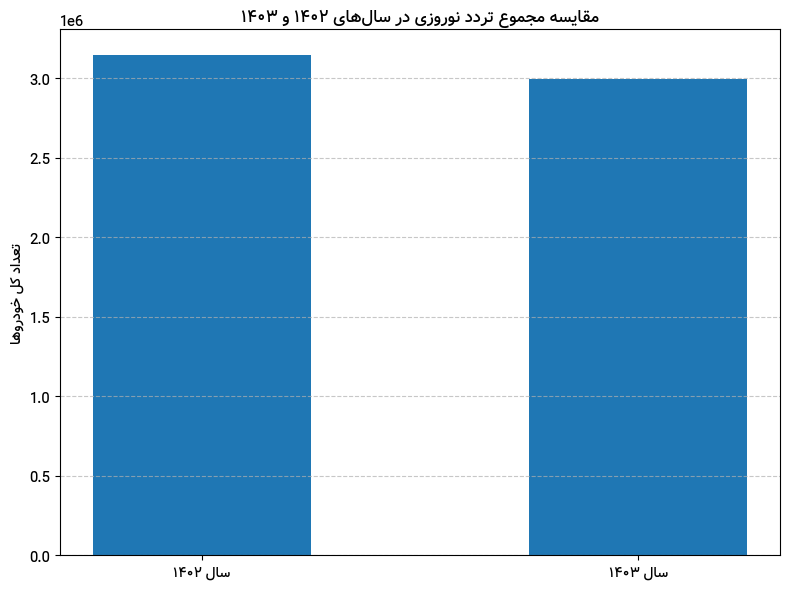

In [23]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# Set Persian font
matplotlib.rcParams['font.family'] = 'Vazir'  # or 'Tahoma'
matplotlib.rcParams['axes.unicode_minus'] = False

# Prepare reshaped Persian labels
labels_by_hand = ['سال ۱۴۰۲', 'سال ۱۴۰۳']
labels = [get_display(arabic_reshaper.reshape(label)) for label in labels_by_hand]

# Sum of vehicle counts for each year
count_03 = df_merged['est_sum_total_est_x'].sum()
count_02 = df_merged['est_sum_total_est_y'].sum()
print((count_03 - count_02) / count_02)

# Data for plotting
counts = [count_02, count_03]
x = np.arange(len(labels))
width = 0.5

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(x, counts, width)

plt.xticks(ticks=x, labels=labels)
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد کل خودروها')))  # Total number of vehicles
plt.title(get_display(arabic_reshaper.reshape('مقایسه مجموع تردد نوروزی در سال‌های ۱۴۰۲ و ۱۴۰۳')))  # Title in Persian
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
import plotly.graph_objects as go
import pandas as pd

# جمع کل ترددها برای هر سال
count_02 = df_merged['est_sum_total_est_y'].sum()
count_03 = df_merged['est_sum_total_est_x'].sum()

# داده‌ها برای رسم نمودار
labels = ['سال ۱۴۰۲', 'سال ۱۴۰۳']
values = [count_02, count_03]
colors = ['#FFA55D', '#1d3557']

# رسم نمودار ستونی با Plotly
fig = go.Figure(data=[
    go.Bar(
        x=labels,
        y=values,
        marker_color=colors,
        text=[f'{int(v):,}' for v in values],
        textposition='outside'
    )
])

# تنظیمات ظاهری مطابق قالب تمپلیت اصلی
fig.update_layout(
    title='<b>مقایسه مجموع تردد نوروزی اصفهان در سال‌های ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    xaxis=dict(
        title='سال',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
    ),
    yaxis=dict(
        title='تعداد کل خودروها',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
    ),
    font=dict(
        family='Yas',
        size=14,
    ),
    template='plotly_white',
    height=600,
    hovermode='x unified'
)

fig.show()


In [12]:
city_in_df = df[df['code'].isin(city_roads_df[city_roads_df.destination == city]['code'].tolist())]
city_out_df = df[df['code'].isin(city_roads_df[city_roads_df.origin == city]['code'].tolist())]

city_in_df.head()

,code,name,date,duration,total_count,car_count,total_est,car_est,avg_speed,total_est_normal
5157,543269,تقاطع سراوان - رشت,1402-12-11,55.0,874.0,736.0,19595.0,16501.0,92.0,-0.491171
5158,543269,تقاطع سراوان - رشت,1402-12-16,165.0,1991.0,1584.0,18824.0,14976.0,104.0,-0.700625
5159,543269,تقاطع سراوان - رشت,1402-12-17,1200.0,16092.0,11633.0,20174.0,14583.0,101.0,-0.333877
5160,543269,تقاطع سراوان - رشت,1402-12-18,1415.0,18987.0,14210.0,19366.0,14493.0,103.0,-0.553382
5161,543269,تقاطع سراوان - رشت,1402-12-19,1240.0,15169.0,12916.0,19213.0,16359.0,92.0,-0.594947


In [13]:
date = jdatetime.datetime.strptime("1402-12-10", "%Y-%m-%d").date()

in_list, out_list = [], []

for _ in range(40):
    in_cnt, out_cnt = 0, 0
    print(date)
    in_cnt = city_in_df[city_in_df.date == date].car_est.sum()
    out_cnt = city_out_df[city_out_df.date == date].car_est.sum()

    in_list.append([date, in_cnt, 'ورودی'])
    out_list.append([date, out_cnt, 'خروجی'])

    print(f"in: {in_cnt}, out: {out_cnt}, diff: {in_cnt - out_cnt}")
    date = date + jdatetime.timedelta(days=1)

1402-12-10
in: 118536.0, out: 87274.0, diff: 31262.0
1402-12-11
in: 132097.0, out: 83407.0, diff: 48690.0
1402-12-12
in: 128359.0, out: 87951.0, diff: 40408.0
1402-12-13
in: 129167.0, out: 94621.0, diff: 34546.0
1402-12-14
in: 125555.0, out: 93566.0, diff: 31989.0
1402-12-15
in: 129713.0, out: 95337.0, diff: 34376.0
1402-12-16
in: 155144.0, out: 100395.0, diff: 54749.0
1402-12-17
in: 155407.0, out: 104964.0, diff: 50443.0
1402-12-18
in: 140846.0, out: 98501.0, diff: 42345.0
1402-12-19
in: 150963.0, out: 104251.0, diff: 46712.0
1402-12-20
in: 122519.0, out: 71609.0, diff: 50910.0
1402-12-21
in: 119998.0, out: 72920.0, diff: 47078.0
1402-12-22
in: 113777.0, out: 73540.0, diff: 40237.0
1402-12-23
in: 125005.0, out: 71847.0, diff: 53158.0
1402-12-24
in: 124475.0, out: 78378.0, diff: 46097.0
1402-12-25
in: 115850.0, out: 64720.0, diff: 51130.0
1402-12-26
in: 130872.0, out: 75077.0, diff: 55795.0
1402-12-27
in: 174399.0, out: 99993.0, diff: 74406.0
1402-12-28
in: 184010.0, out: 101239.0, dif

In [14]:
in_tmp_df = pd.DataFrame(in_list, columns=['date', 'cnt', 'color'])
out_tmp_df = pd.DataFrame(out_list, columns=['date', 'cnt', 'color'])

flow_df = pd.concat([in_tmp_df, out_tmp_df], ignore_index=True)
flow_df

,date,cnt,color
0,1402-12-10,118536.0,ورودی
1,1402-12-11,132097.0,ورودی
2,1402-12-12,128359.0,ورودی
3,1402-12-13,129167.0,ورودی
4,1402-12-14,125555.0,ورودی
...,...,...,...
75,1403-01-16,113970.0,خروجی
76,1403-01-17,105418.0,خروجی
77,1403-01-18,95770.0,خروجی
78,1403-01-19,92848.0,خروجی


In [17]:
fig = px.bar(
    flow_df[
        (flow_df['date'] > jdatetime.datetime.strptime('1402-12-25', "%Y-%m-%d").date()) &
        (flow_df['date'] < jdatetime.datetime.strptime('1403-01-17', "%Y-%m-%d").date())],
    x='date',
    y='cnt',
    color='color',
    barmode='group',
    color_discrete_sequence=['green', 'red'],  # Custom colors
    title=f"<b>ورودی و خروجی برحسب تاریخ در {city}</b>"
)

fig.update_layout(
    xaxis=dict(
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray'
    )
)

fig.update_layout(
    font=dict(
        family='Yas',  # Use a Persian font
        size=14,
    ),
    title_x=0.5,  # Center title
    xaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=14)
    )
)


fig.update_layout(
    legend_title='',
    xaxis_title='تاریخ',
    xaxis_type='category',
    bargap=0.4,  # Gap between bars of different classes
    bargroupgap=0,  # Gap between bars of same class
    yaxis_title='تعداد',
    template='plotly_white',
    hovermode='x unified',
)

fig.show()